In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
 
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\milk.csv', index_col=0)
df.head()

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


<Figure size 400x400 with 0 Axes>

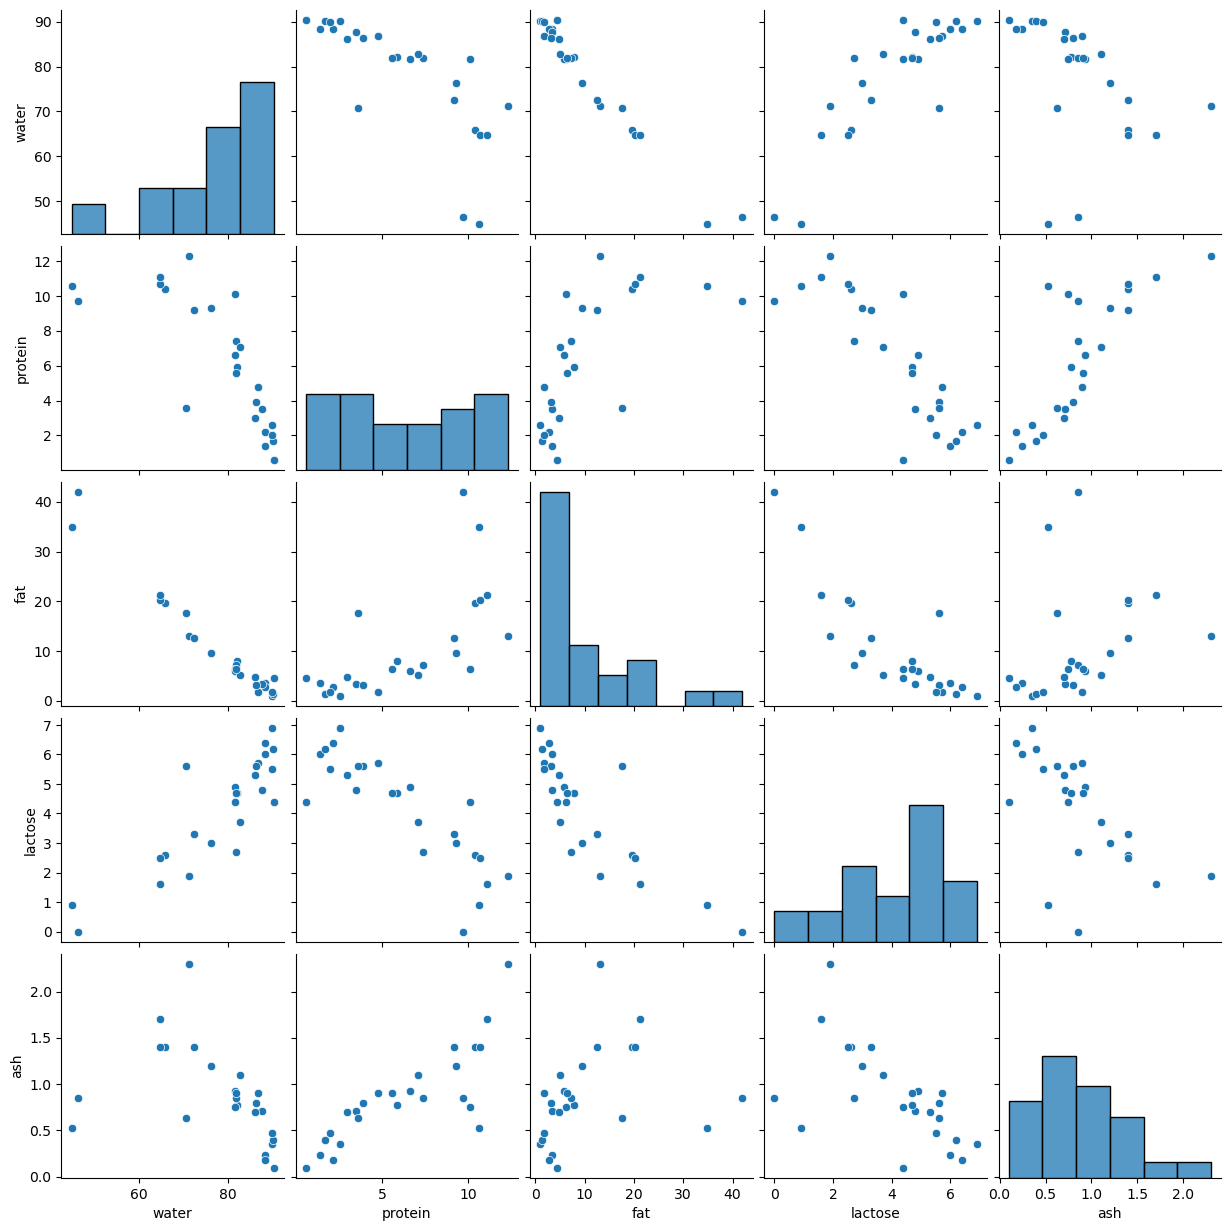

In [11]:
plt.figure(figsize=(4,4))
sns.pairplot(data=df, palette="Set2")
plt.show()

In [12]:
scalar = StandardScaler().set_output(transform='pandas')
df_scaled = scalar.fit_transform(df)

In [28]:
scores = []
no_clusters = [2,3,4,5,6]
for i in no_clusters:
    clust = KMeans(
        n_clusters=i,  
    )
    clust.fit(df_scaled.iloc[:, :5])

    scores.append(
        silhouette_score(df_scaled.iloc[:, :5], clust.labels_)
    )

print(scores)

index_max = np.argmax(scores)
best_no_clust = no_clusters[index_max]
print('Best number of clusters', best_no_clust)

[0.5258508931703421, 0.3898715480186775, 0.44348050284244644, 0.3749635825079736, 0.3382753791816678]
Best number of clusters 2


In [32]:
ag_clust = KMeans(
    n_clusters=best_no_clust,      
)

ag_clust.fit(df_scaled)

if best_no_clust > 1:
    print(
        'Silhouette Score:', 
        silhouette_score(df_scaled, ag_clust.labels_)
    )

Silhouette Score: 0.5258508931703421


In [30]:
df_clusters = pd.DataFrame({
    'Cluster': ag_clust.labels_,
    }, index=df_scaled.index
).sort_values('Cluster')

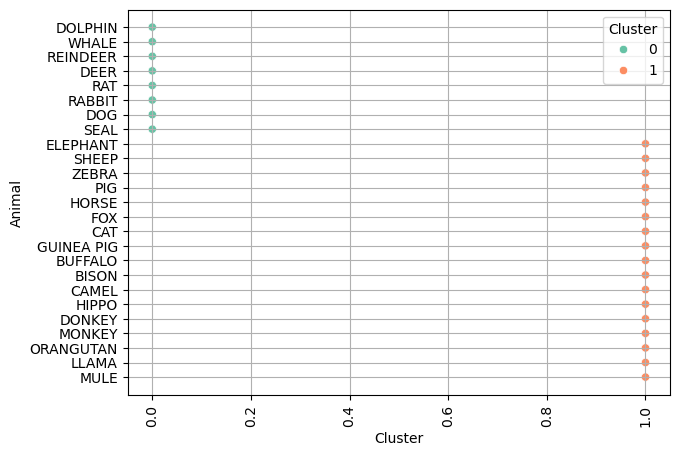

In [31]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='Cluster', 
    y=df_clusters.index,
    hue='Cluster', 
    data=df_clusters, 
    palette='Set2'
)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

